# EAS502 - Introduction to Probabilty Project

### Team members - Vivek Patil (E-95), Nishi Mandhana (E-70)

In this project, I have created a simulation where a robot moves towards an object in 3 different strategies. We have been given different probabilites at which the object moves left or right (p_om). The initial distance could be between 10 and 19, both included, with equal probabilites. We need to simulate time taken by the robot to catch the object at various initial distances for each p_om.

Strategies followed by robot would be:
1. Strategy 1 : At each unit of time, the robot will move 1 unit toward the object regardless of the object movement. 
2. Strategy 2: At each unit of time, the robot will move 1 unit toward the object (with the probability of 1.5 p_om )  or will stop (with the probability of 1-1.5p_om) regardless of the object movement.
3. Strategy 3: At each unit of time, the robot will move 1 unit toward the object if the object  moves to either left or right, and the robot will stop if the object stops. 

## Note:
1. Here we are assuming the robot is on the number line starting at 0, and the object is on the right at some *+ve* initial distance
2. Swapping of the positions never happen. If the object passes the robot, it will be considered as caught.

## Importing all the necessary libraries

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import csv

### Just getting ready to plot beautiful graphs

In [3]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

Setting up the column names and files to store our data from the simulation

In [4]:
fields = ['strat', 'init_dist', 'p_om', 'time_taken']
filename = 'data.csv'
analytical_filename = 'analytical_data.csv'

Given information

In [5]:
#Initial Distances
init_d = [i for i in range(10, 20)]

#Probabilites of Object movement
Prob_obj_mov = [0.1, 0.2, 0.3, 0.4, 0.5]

#Probabilities of Object going right, left or stopping
Pos = [[0.1, 0.1, 0.8], [0.2, 0.2, 0.6], [
    0.3, 0.3, 0.4], [0.4, 0.4, 0.2], [0.5, 0.5, 0]]

#Object moving 1 step to right or left or 0 for stopping
obj_mov = [1, -1, 0]

In [6]:
#Ajusting robot's movement for Strategy 2
rob_Pos = [[0.15, 0.85], [0.3, 0.7], [0.45, 0.55], [0.6, 0.4], [0.75, 0.25]]
rob_mov = [1, 0]

## The Strategies

### Strategy 1

In [7]:
def strat_1(i, obj_pos):
    time_taken = 0
    rob_pos = 0

    row = [1, obj_pos]

    while(rob_pos != obj_pos):
        obj_pos += np.random.choice(obj_mov, p=Pos[i])
        time_taken += 1
        if rob_pos == obj_pos:
            break
        if (rob_pos < obj_pos):
            rob_pos += 1
        else:
            rob_pos -= 1

    row.append(Prob_obj_mov[i])
    row.append(time_taken)
    rows.append(row)


### Strategy 2

In [8]:
def strat_2(i, obj_pos):
    time_taken = 0
    rob_pos = 0

    row = [2, obj_pos]

    while(rob_pos != obj_pos):
        obj_pos += np.random.choice(obj_mov, p=Pos[i])
        time_taken += 1
        if rob_pos == obj_pos:
            break
        if (rob_pos < obj_pos):
            rob_pos += np.random.choice(rob_mov, p=rob_Pos[i])
        else:
            rob_pos -= np.random.choice(rob_mov, p=rob_Pos[i])

    row.append(Pos[i][0])
    row.append(time_taken)
    rows.append(row)


### Strategy 3

In [9]:
def strat_3(i, obj_pos):
    time_taken = 0
    rob_pos = 0

    row = [3, obj_pos]

    while(rob_pos != obj_pos):
        obj_chg = np.random.choice(obj_mov, p=Pos[i])
        time_taken += 1
        if (obj_chg != 0):
            if rob_pos == obj_pos:
                break
            if (rob_pos < obj_pos):
                rob_pos += 1
            else:
                rob_pos -= 1

    row.append(Pos[i][0])
    row.append(time_taken)
    rows.append(row)

## LET THE SIMULATIONS BEGIN!

In [10]:
rows = []

#Running the simulation for 3000 time for every p_om
#There will be a total of 3000*5 = 15000 data points to work with
for _ in range(3000):
    for i in range(len(Pos)):

        #Choosing initial distance of the object
        obj_pos = np.random.choice(init_d)

        strat_1(i, obj_pos)
        strat_2(i, obj_pos)
        strat_3(i, obj_pos)


## Storing the data taken from the simulation in data.csv file

In [11]:
with open(filename, 'w') as csvfile:
    # creating a csv writer object
    csvwriter = csv.writer(csvfile)

    # writing the fields
    csvwriter.writerow(fields)

    # writing the data rows
    csvwriter.writerows(rows)

df = pd.read_csv(filename)
df.sample(n=10)

#Reading the data from our MATLAB outputs
analytical_df = pd.read_csv(analytical_filename)

## Will you plot me?

In [12]:
def plot_me_please(df, strat, p_om):
    print("-"*40)
    print("Stats for strategy ", strat, " & P_om ", p_om)
    print("-"*40)
    print(df["time_taken"].describe())
    print("-"*40 + "\n")
    if strat != 2:
        print("Analytical solution from MATLAB = ", analytical_df[(
            analytical_df["strat"] == strat) & (analytical_df["p_om"] == p_om)].iloc[0]["time_taken"])
    else:
        print("No analytical solution found on MATLAB for Strategy #2")
    plt.hist(df.time_taken, init_d)
    plt.show()

## Yes, I will plot you!

I have plotted the summary of the database for each p_om and how it performs for each strategy and compared with analytical solution we obtained from MATLAB.

----------------------------------------
Stats for strategy  1  & P_om  0.1
----------------------------------------
count    3000.000000
mean       14.591333
std         3.257073
min         6.000000
25%        12.000000
50%        15.000000
75%        17.000000
max        28.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  14.6


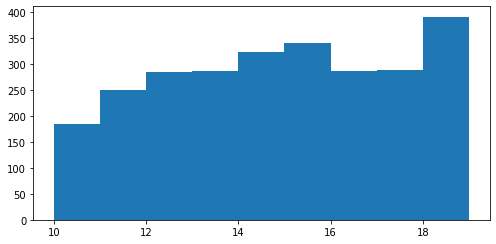

----------------------------------------
Stats for strategy  2  & P_om  0.1
----------------------------------------
count    3000.000000
mean       97.528667
std        41.378899
min        14.000000
25%        68.000000
50%        90.000000
75%       121.000000
max       378.000000
Name: time_taken, dtype: float64
----------------------------------------

No analytical solution found on MATLAB for Strategy #2


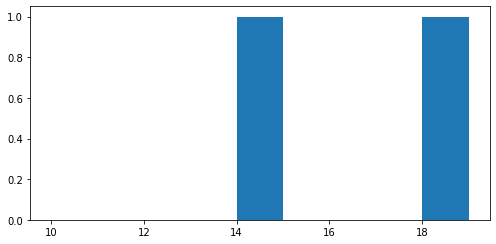

----------------------------------------
Stats for strategy  3  & P_om  0.1
----------------------------------------
count    3000.000000
mean       72.377000
std        22.034202
min        22.000000
25%        56.000000
50%        71.000000
75%        87.000000
max       165.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  75.0


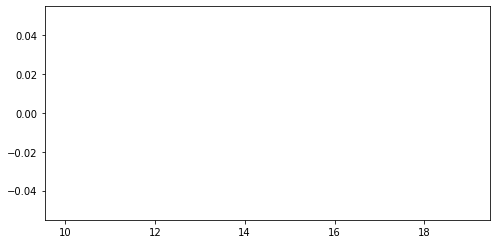

----------------------------------------
Stats for strategy  1  & P_om  0.2
----------------------------------------
count    3000.000000
mean       14.658333
std         3.806805
min         6.000000
25%        12.000000
50%        14.000000
75%        17.000000
max        30.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  14.7


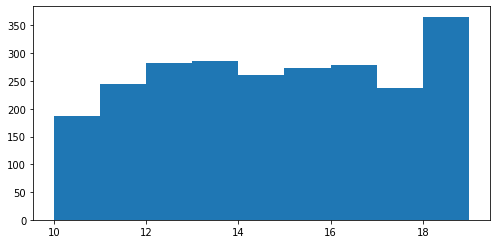

----------------------------------------
Stats for strategy  2  & P_om  0.2
----------------------------------------
count    3000.000000
mean       48.694333
std        20.460461
min        10.000000
25%        34.000000
50%        46.000000
75%        60.000000
max       168.000000
Name: time_taken, dtype: float64
----------------------------------------

No analytical solution found on MATLAB for Strategy #2


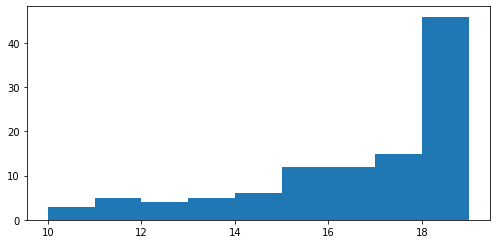

----------------------------------------
Stats for strategy  3  & P_om  0.2
----------------------------------------
count    3000.000000
mean       36.428667
std        10.456004
min        11.000000
25%        29.000000
50%        35.000000
75%        43.000000
max        77.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  37.5


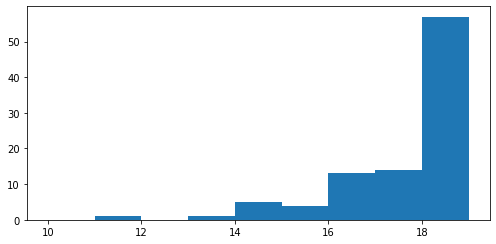

----------------------------------------
Stats for strategy  1  & P_om  0.3
----------------------------------------
count    3000.000000
mean       14.912667
std         4.140461
min         6.000000
25%        12.000000
50%        15.000000
75%        18.000000
max        33.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  14.8


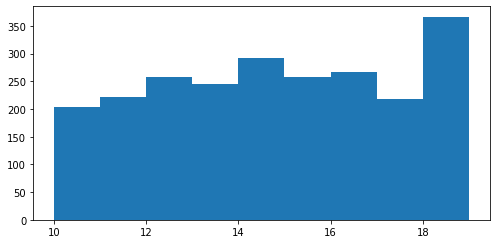

----------------------------------------
Stats for strategy  2  & P_om  0.3
----------------------------------------
count    3000.000000
mean       32.633000
std        13.423277
min         7.000000
25%        23.000000
50%        30.000000
75%        40.000000
max       111.000000
Name: time_taken, dtype: float64
----------------------------------------

No analytical solution found on MATLAB for Strategy #2


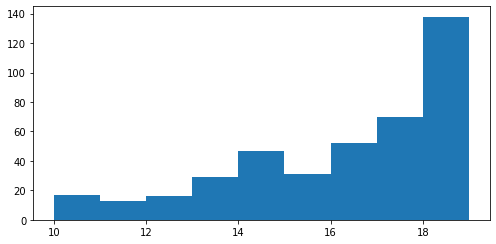

----------------------------------------
Stats for strategy  3  & P_om  0.3
----------------------------------------
count    3000.000000
mean       24.242667
std         6.327332
min        11.000000
25%        19.000000
50%        24.000000
75%        29.000000
max        48.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  25.0


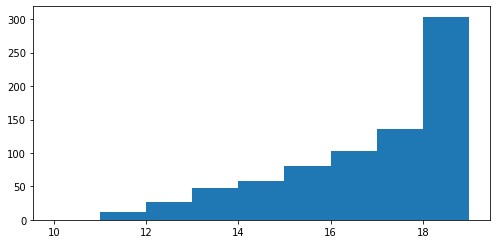

----------------------------------------
Stats for strategy  1  & P_om  0.4
----------------------------------------
count    3000.000000
mean       15.079333
std         4.588833
min         5.000000
25%        12.000000
50%        15.000000
75%        18.000000
max        34.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  14.8996


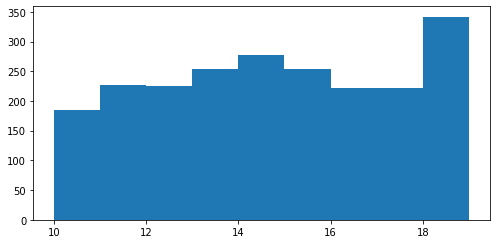

----------------------------------------
Stats for strategy  2  & P_om  0.4
----------------------------------------
count    3000.000000
mean       25.070667
std        10.107014
min         7.000000
25%        18.000000
50%        23.000000
75%        30.000000
max        95.000000
Name: time_taken, dtype: float64
----------------------------------------

No analytical solution found on MATLAB for Strategy #2


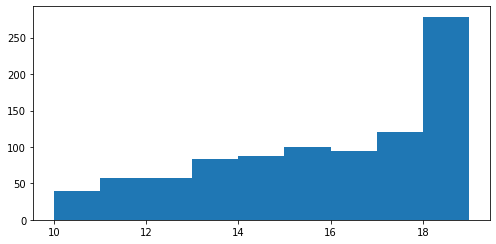

----------------------------------------
Stats for strategy  3  & P_om  0.4
----------------------------------------
count    3000.000000
mean       18.356000
std         4.202676
min        10.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        32.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  18.75


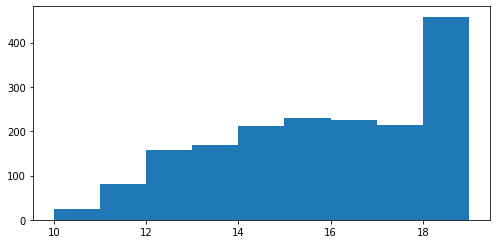

----------------------------------------
Stats for strategy  1  & P_om  0.5
----------------------------------------
count    3000.000000
mean       14.897667
std         4.780810
min         5.000000
25%        11.000000
50%        15.000000
75%        18.000000
max        36.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  15.0


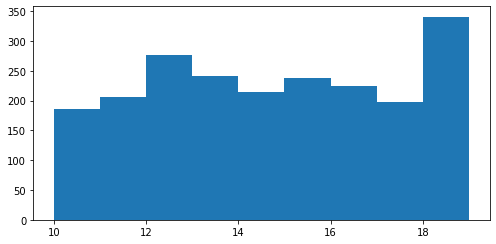

----------------------------------------
Stats for strategy  2  & P_om  0.5
----------------------------------------
count    3000.000000
mean       19.933000
std         7.536408
min         5.000000
25%        14.000000
50%        19.000000
75%        24.250000
max        55.000000
Name: time_taken, dtype: float64
----------------------------------------

No analytical solution found on MATLAB for Strategy #2


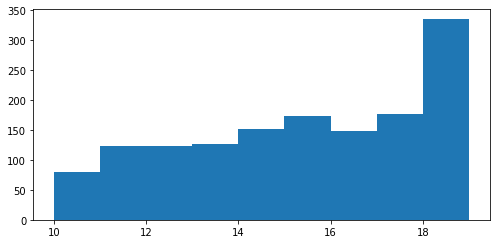

----------------------------------------
Stats for strategy  3  & P_om  0.5
----------------------------------------
count    3000.000000
mean       14.509667
std         2.855046
min        10.000000
25%        12.000000
50%        15.000000
75%        17.000000
max        19.000000
Name: time_taken, dtype: float64
----------------------------------------

Analytical solution from MATLAB =  15.0


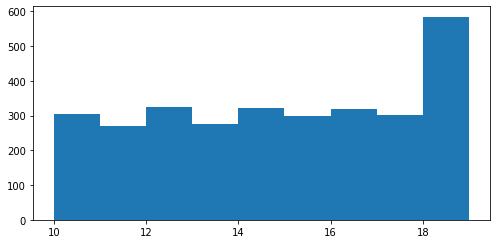

In [13]:
for i in Prob_obj_mov:
    for j in range(1, 4):
        plot_me_please(df[(df["strat"] == j) & (df["p_om"] == i)], j, i)